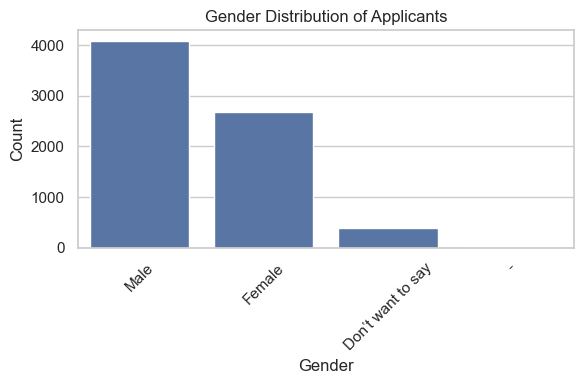

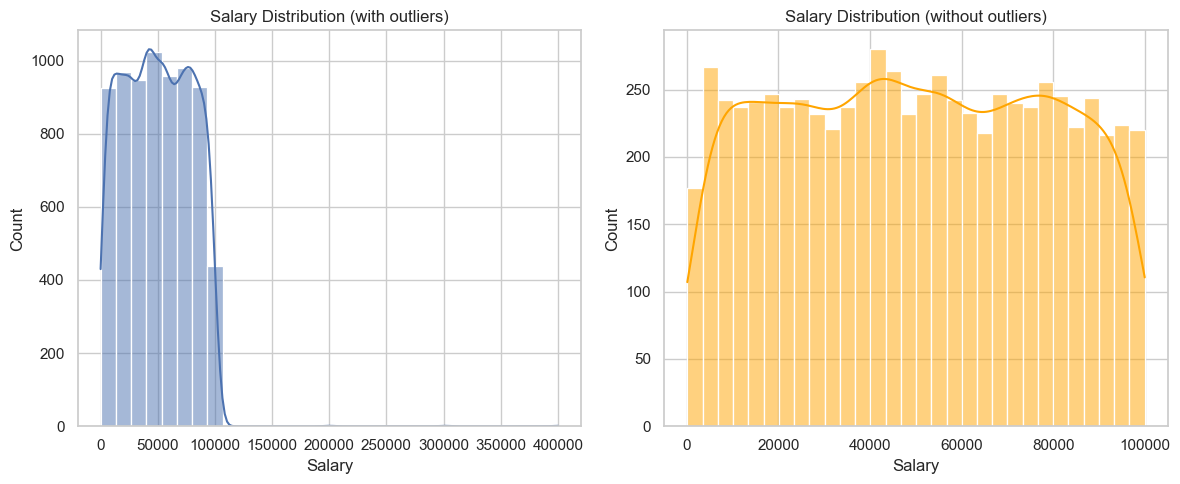

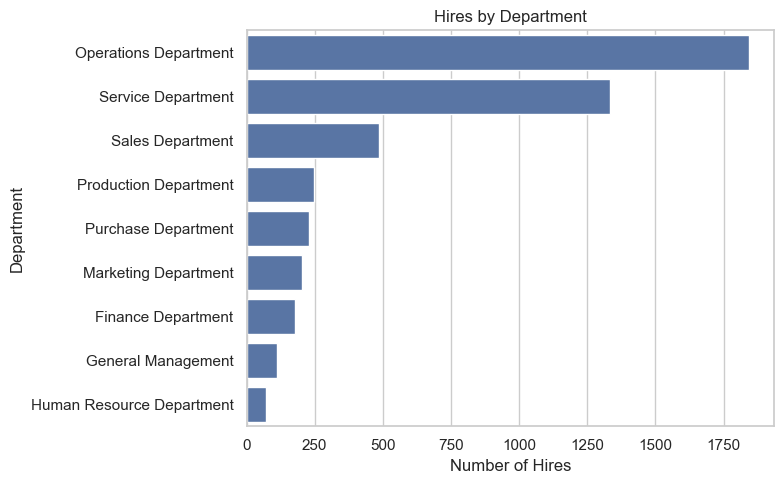

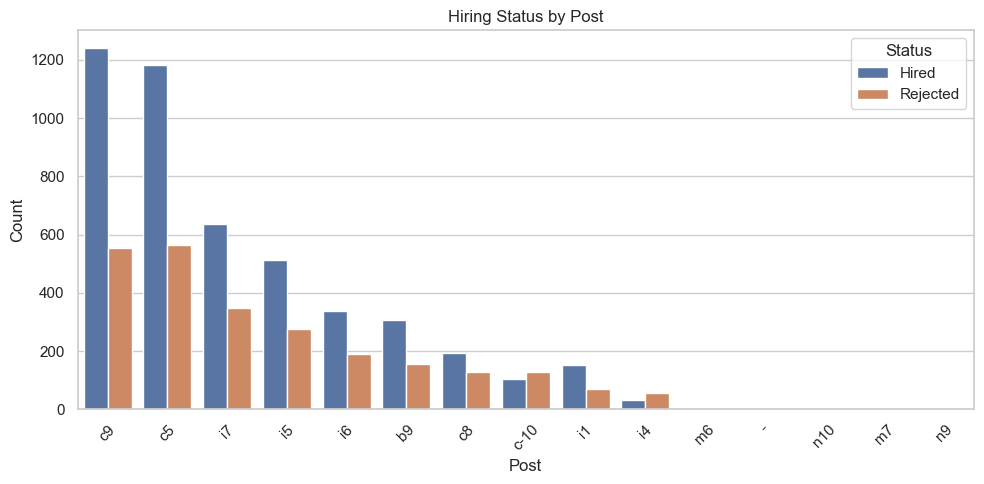

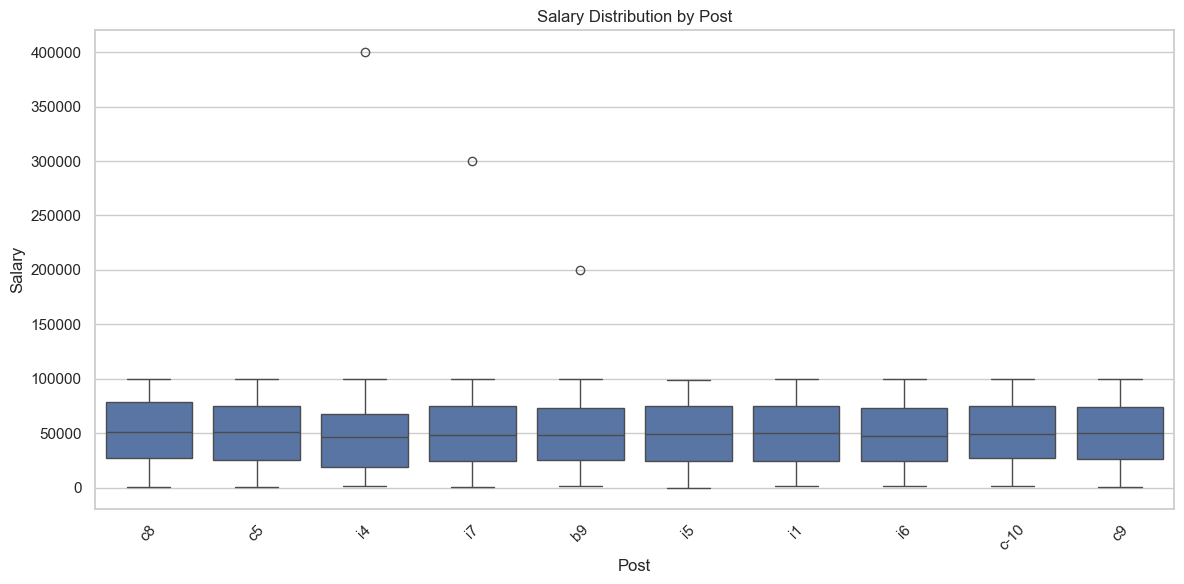

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\Sudip\Downloads\Hiring_Process.csv")  # Update the path if needed

# ---------------------
# 🧹 DATA CLEANING
# ---------------------

# Rename columns for clarity
df.rename(columns={
    'Interview Taken on': 'Interview_Date',
    'event_name': 'Gender',
    'Post Name': 'Post',
    'Offered Salary': 'Salary'
}, inplace=True)

# Convert Interview_Date to datetime (explicit format)
df['Interview_Date'] = pd.to_datetime(df['Interview_Date'], format="%m/%d/%y %H:%M", errors='coerce')

# Fill missing salary with median (no inplace to avoid chained assignment warning)
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# Detect outliers using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create is_outlier flag
df['is_outlier'] = ((df['Salary'] < lower_bound) | (df['Salary'] > upper_bound))

# Set seaborn style
sns.set(style="whitegrid")

# ---------------------
# 📊 VISUALIZATIONS
# ---------------------

# 1. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title("Gender Distribution of Applicants")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Salary Distribution (with and without outliers)
plt.figure(figsize=(12,5))

# With Outliers
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title("Salary Distribution (with outliers)")

# Without Outliers
plt.subplot(1, 2, 2)
sns.histplot(df[~df['is_outlier']]['Salary'], bins=30, kde=True, color='orange')
plt.title("Salary Distribution (without outliers)")

plt.tight_layout()
plt.show()

# 3. Department-wise Hires (Only Hired)
plt.figure(figsize=(8,5))
sns.countplot(data=df[df['Status'] == 'Hired'], y='Department',
              order=df['Department'].value_counts().index)
plt.title("Hires by Department")
plt.xlabel("Number of Hires")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 4. Hiring Status by Post (Top 15 Posts)
plt.figure(figsize=(10,5))
top_posts = df['Post'].value_counts().nlargest(15).index
sns.countplot(data=df[df['Post'].isin(top_posts)], x='Post', hue='Status', order=top_posts)
plt.title("Hiring Status by Post")
plt.xlabel("Post")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Salary Distribution by Post (Top 10 Posts)
plt.figure(figsize=(12,6))
top_10_posts = df['Post'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Post'].isin(top_10_posts)], x='Post', y='Salary')
plt.title("Salary Distribution by Post")
plt.xlabel("Post")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
